# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [138]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [139]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"



### Step 3. Assign it to a variable apple

In [140]:
apple = pd.read_csv(url, sep= ',') 

In [141]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [142]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [143]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple["Date"].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [155]:
apple = apple.set_index("Date")
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [160]:
#Aquí es False que haya duplicado
apple.index.duplicated().any()

False

In [161]:
#Aquí es True que todos sean unique
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [162]:
apple = apple[::-1]
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 9. Get the last business day of each month

In [163]:
#apple2 = apple.copy()
apple.groupby(apple.index.strftime('%Y-%m')).tail(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-06-02,633.96,634.83,622.50,628.65,92337700,89.81
2014-05-01,592.00,594.80,586.36,591.48,61012000,84.03
2014-04-01,537.76,541.87,536.77,541.65,50190000,76.95
2014-03-03,523.42,530.65,522.81,527.76,59695300,74.98


### Step 10.  What is the difference in days between the first day and the oldest

In [169]:
di = apple.index.max() - apple.index.min() 
str(di)

'12261 days 00:00:00'

12261

### Step 11.  How many months in the data we have?

In [177]:
apple['month'] = pd.DatetimeIndex(apple.index).month
apple["month"]

Date
2014-07-08     7
2014-07-07     7
2014-07-03     7
2014-07-02     7
2014-07-01     7
              ..
1980-12-18    12
1980-12-17    12
1980-12-16    12
1980-12-15    12
1980-12-12    12
Name: month, Length: 8465, dtype: int64

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [180]:
apple["Adj Close"]

Date
2014-07-08    95.35
2014-07-07    95.97
2014-07-03    94.03
2014-07-02    93.48
2014-07-01    93.52
              ...  
1980-12-18     0.41
1980-12-17     0.40
1980-12-16     0.39
1980-12-15     0.42
1980-12-12     0.45
Name: Adj Close, Length: 8465, dtype: float64

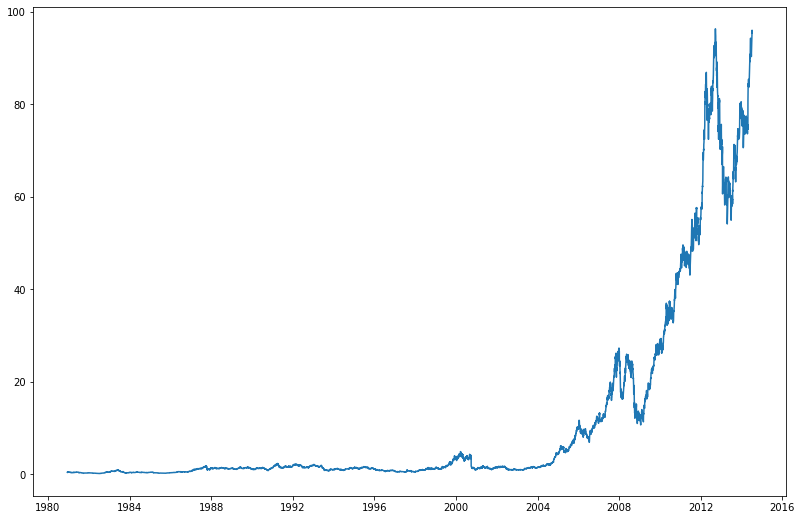

In [183]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple["Adj Close"])
plt.show()

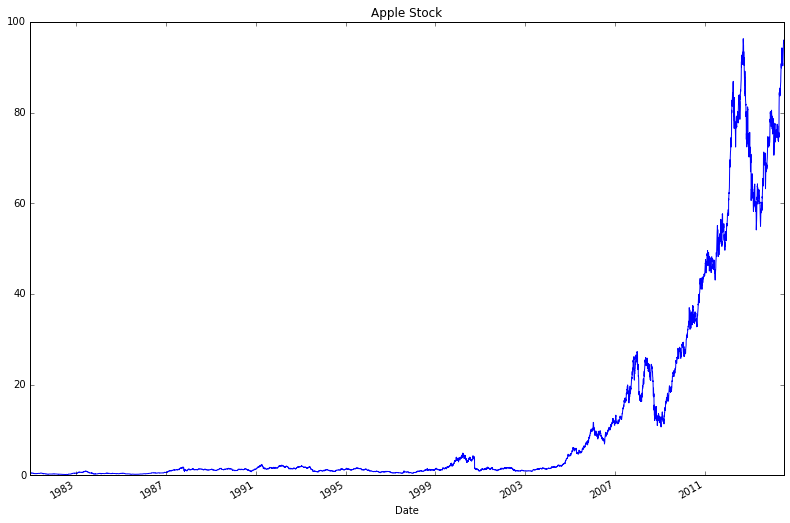

### BONUS: Create your own question and answer it.